## Mahmoud Emara

### Task 1: Least Squares Regression

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
boston, target = load_boston(True)

bostonDataset = boston.data
print("Data dimensions:",bostonDataset.shape)
print("Labels dimensions:",target.shape)

bLabels = target
augVec = np.ones(shape = target.shape)
augData = np.column_stack((bostonDataset, augVec))
print("Augmented data dimensions:",augData.shape)

invXTX = np.linalg.inv(augData.T@augData)
XTY = augData.T@bLabels
print("X^T*X:",invXTX.shape)
print("X^T*Y:",XTY.shape)

what = invXTX@XTY
print("what dimensions:",what.shape)
#print("what:\n",w)

yhat = augData@what
error = np.linalg.norm((target-yhat),2)
avgError = (error**2)/506                
print("\nPrediction error:",avgError)

Data dimensions: (506, 13)
Labels dimensions: (506,)
Augmented data dimensions: (506, 14)
X^T*X: (14, 14)
X^T*Y: (14,)
what dimensions: (14,)

Prediction error: 21.8977792176875


### 5-fold Cross Validation

In [2]:
# 5-fold Cross Validation
test1 = augData[0:101,:];   testLab1 = bLabels[0:101]; 
test2 = augData[101:202,:]; testLab2 = bLabels[101:202]; 
test3 = augData[202:303,:]; testLab3 = bLabels[202:303]; 
test4 = augData[303:404,:]; testLab4 = bLabels[303:404]; 
test5 = augData[404:,:];    testLab5 = bLabels[404:];

train1 = augData[101:,:]; trainTarg1 = bLabels[101:]

train2 = np.concatenate((augData[0:101,:], augData[202:,:]),axis=0)
trainTarg2 = np.concatenate((bLabels[0:101:], bLabels[202:]),axis=0)

train3 = np.concatenate((augData[0:202,:], augData[303:,:]),axis=0)
trainTarg3 = np.concatenate((bLabels[0:202], bLabels[303:]), axis=0)

train4 = np.concatenate((augData[0:303,:], augData[404:,:]),axis=0)
trainTarg4 = np.concatenate((bLabels[0:303], bLabels[404:]),axis=0)

train5 = augData[0:404:,:]; trainTarg5 = bLabels[0:404]

def leastSquares(augmentedData, label):
    invXTX = np.linalg.inv(augmentedData.T@augmentedData)
    XTY = augmentedData.T@label
    what = invXTX@XTY
    return what

what1 = leastSquares(train1, trainTarg1)
what2 = leastSquares(train2, trainTarg2)
what3 = leastSquares(train3, trainTarg3)
what4 = leastSquares(train4, trainTarg4)
what5 = leastSquares(train5, trainTarg5)

yhat1 = test1@what1
error1 = np.linalg.norm((testLab1-yhat1),2)
avgError1 = (error1**2)/101

yhat2 = test2@what2
error2 = np.linalg.norm((testLab2-yhat2),2)
avgError2 = (error2**2)/101 

yhat3 = test3@what3
error3 = np.linalg.norm((testLab3-yhat3),2)
avgError3 = (error3**2)/101 

yhat4 = test4@what4
error4 = np.linalg.norm((testLab4-yhat4),2)
avgError4 = (error4**2)/101 

yhat5 = test5@what5
error5 = np.linalg.norm((testLab5-yhat5),2)
avgError5 = (error5**2)/102 

avgEr = [avgError1, avgError2, avgError3, avgError4, avgError5]
bestLam = np.mean(avgEr)/506

print("Test Error 1: ",avgEr[0])
print("Test Error 2: ",avgEr[1])
print("Test Error 3: ",avgEr[2])
print("Test Error 4: ",avgEr[3])
print("Test Error 5: ",avgEr[4])
print("Average prediction error:",np.mean(avgEr))
print("Best lamda:",bestLam)

# multply the predicted what in least squares by the x to get new y

Test Error 1:  12.595210247890764
Test Error 2:  25.857422765462097
Test Error 3:  33.88597898742008
Test Error 4:  80.21271391665015
Test Error 5:  33.075626492274495
Average prediction error: 37.12539048193951
Best lamda: 0.07337033692082907


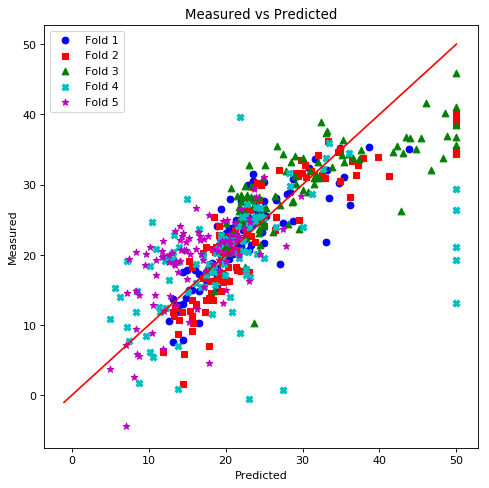

In [3]:
plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
onePlot = plt.scatter(testLab1, yhat1, color='b', marker='o', label='Fold 1')
twoPlot = plt.scatter(testLab2, yhat2, color='r', marker='s', label='Fold 2')
thrPlot = plt.scatter(testLab3, yhat3, color='g', marker='^', label='Fold 3')
fouPlot = plt.scatter(testLab4, yhat4, color='c', marker='X', label='Fold 4')
fivPlot = plt.scatter(testLab5, yhat5, color='m', marker='*', label='Fold 5')
plt.plot(np.linspace(-1,50,50), np.linspace(-1,50,50),color='r')
plt.title('Measured vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.legend(handles = [onePlot, twoPlot, thrPlot, fouPlot, fivPlot])
plt.grid
plt.show()

### Task 2: Ridge Regression

In [4]:
# Ridge Regression

bosLab = target
augVector = np.ones(shape = target.shape)
augDataset = np.column_stack((boston.data, augVector))

XTXilam1 = np.linalg.inv((augDataset.T@augDataset) + (bestLam*np.identity(14)))
XTy = augDataset.T@bosLab
whatr1 = XTXilam1@XTy
yhatr1 = augDataset@whatr1

errorRidge1 = np.linalg.norm((target-yhatr1),2)
avgRidgeErr1 = (errorRidge1**2)/506

print("Prediction error:",avgRidgeErr1)

Prediction error: 21.91817771198977


In [5]:
# Ridge Regression 5-fold Cross Validation

fold1 = augDataset[0:101,:];   lfold1 = bosLab[0:101]
fold2 = augDataset[101:202,:]; lfold2 = bosLab[101:202]
fold3 = augDataset[202:303,:]; lfold3 = bosLab[202:303]
fold4 = augDataset[303:404,:]; lfold4 = bosLab[303:404]
fold5 = augDataset[404:,:];    lfold5 = bosLab[404:]

def ridgeRegression(x_hat, y_hat, Lambda):
    XTXilamda = np.linalg.inv((x_hat.T@x_hat) + Lambda*np.identity(14))
    XT_y = x_hat.T@y_hat
    w_hat = XTXilamda@XT_y
    return w_hat  

def ridgeRegCR(train1, train2, train3, valid, test, trainLab1, trainLab2, trainLab3, vLab, tLab):
    bestErrors = []
    arbErr = np.inf
    bestLambda = 0
    for lam in (np.arange(0,1,0.002)):
        errArr = []
        finalErrors = []
        trainSet = np.concatenate((train1,train2,train3))
        trainLabs = np.concatenate((trainLab1, trainLab2, trainLab3))
        
        # Cross Validation on Training and Validation Sets
        ridge = ridgeRegression(trainSet, trainLabs, lam)
        prediction = valid@ridge
        testLabs = np.reshape(vLab,(prediction.shape[0],1))
        errArr.append((np.linalg.norm((prediction - testLabs),2))**2 / prediction.shape[0])
        
        # Test on test set
        newTrain = np.concatenate((valid, trainSet))
        newLabs = np.concatenate((vLab, trainLabs))
        w = ridgeRegression(newTrain, newLabs, lam)
        pred = test@w
        testLabels = np.reshape(tLab,(pred.shape[0],1))
        finalErrors.append((np.linalg.norm((pred - testLabels),2))**2 / pred.shape[0])
    
    # Check for updated errors
    if(np.mean(errArr) < arbErr):
        arbErr = np.mean(errArr)
        bestLamda = lam
        bestErrors = finalErrors
    
    return bestLamda, bestErrors
        
bestL1, bestErrArr1 = ridgeRegCR(fold1,fold2,fold3,fold4,fold5,lfold1,lfold2,lfold3,lfold4,lfold5)
bestL2, bestErrArr2 = ridgeRegCR(fold2,fold3,fold4,fold5,fold1,lfold2,lfold3,lfold4,lfold5,lfold1)
bestL3, bestErrArr3 = ridgeRegCR(fold3,fold4,fold5,fold1,fold2,lfold3,lfold4,lfold5,lfold1,lfold2)
bestL4, bestErrArr4 = ridgeRegCR(fold4,fold5,fold1,fold2,fold3,lfold4,lfold5,lfold1,lfold2,lfold3)
bestL5, bestErrArr5 = ridgeRegCR(fold5,fold1,fold2,fold3,fold4,lfold5,lfold1,lfold2,lfold3,lfold4)

bestLarr = [bestL1, bestL2, bestL3, bestL4, bestL5]
bestErr = [bestErrArr1, bestErrArr2, bestErrArr3, bestErrArr4, bestErrArr5]

print("Best Lambda:", np.min(bestLarr),"\nAverage prediction error:",(np.mean(bestErr))/augDataset.shape[0])


Best Lambda: 0.998 
Average prediction error: 14.18463020667454
